project name: flexpart_management
created by diego aliaga daliaga_at_chacaltaya.edu.bo

imports

In [1]:

from useful_scit.imps import *
# noinspection PyUnresolvedReferences
import matplotlib.colors
import flexpart_management.modules.FlexLogPol as FlexLogPol
import flexpart_management.modules.constants as co
# noinspection PyUnresolvedReferences
import flexpart_management.modules.flx_array as fa

Loading BokehJS ...

reload


In [21]:
from flexpart_management.modules.clustering_funs import (
    add_total_per_row ,
    add_time_per_row ,
    )

plt.rcParams[ 'figure.facecolor' ] = 'white'
co.LAB = 'lab'

plt.style.use( 'seaborn-whitegrid' )
plt.rcParams[ "legend.frameon" ] = True
plt.rcParams[ "legend.fancybox" ] = True

In [35]:
def plot_range( da , ds , range , suptitle) :
    f , axs = plt.subplots( 2 , 1 , figsize=(20 , 8) , sharex=True ,
                            sharey=True )
    cc = np.array_split(range,2)
    non_rl_dims = [ co.R_CENTER , co.TH_CENTER , co.ZM ]
    for ax , c in zip( axs , cc ) :
        for i in c :
            _bo = ds[ co.LAB ] == i
            dsum = da.where( _bo ).sum( non_rl_dims , keep_attrs=True )
            dsum.plot( label=i , ax=ax )
            ax.legend()
    f.suptitle( suptitle )
    f.tight_layout()
    plt.show()

In [23]:
# def main() :

log.ger.setLevel( log.log.DEBUG )

In [24]:
# noinspection PyUnusedLocal,PyShadowingNames
def open_if_taito() :
    # noinspection SpellCheckingInspection
    path = \
        '/homeappl/home/aliagadi/wrk/DONOTREMOVE' \
        '/flexpart_management_data/runs/' \
        'run_2019-10-02_13-42-52_/' \
        'log_pol/run_2019-10-02_13-42-52_'
    # flp = FLP.FlexLogPol(path,concat=True)
    # flp_instance = FLP.FlexLogPol(path,concat=False)
    selfFLP = FlexLogPol.FlexLogPol(
        path ,
        # concat=True,
        concat=False ,
        get_clusters=False ,
        # open_merged=False,
        open_merged=True ,
        # merge_ds=False ,
        # merge_ds=True ,
        clusters_avail=False ,

        # postprocess set to false since we are opening the re interpolated
        # version
        postprocess=False ,

        use_new_merge_fun=True ,

        # set to false bc already done in the saved version
        filter_r_min_max=False ,
        )
    selfFLP.get_list_datasets_saved()
    # noinspection PyUnresolvedReferences
    ds = selfFLP.open_ds_version( 'ds_clustered_18.nc' )
    return selfFLP , ds

In [25]:
# selfFLP,ds = open_if_taito()
# path = '/Users/diego/flexpart_management/flexpart_management/tmp_data' \
#    '/ds_clustered_18.nc'
# ds = xr.open_dataset(path)

In [27]:
# conc_lab = 'CONC_smooth_t_300_z_25_r_100_th_50'
new_lab_p = 'conc_smooth_p'
new_lab_p_t = 'conc_smooth_p_t'
# add_total_per_row( ds , conc_lab , new_lab_p )
# add_time_per_row( ds , conc_lab , new_lab_p_t )
ds = xr.open_mfdataset( [ co.latest_ds_mac ] )

# print( da_tot )

/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  
/Users/diego/miniconda3/envs/b36/lib/python3.6/site-packages/xarray/backends/api.py:931: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [28]:
# fa.compressed_netcdf_save( ds , latest_ds_mac )

In [29]:
# main()

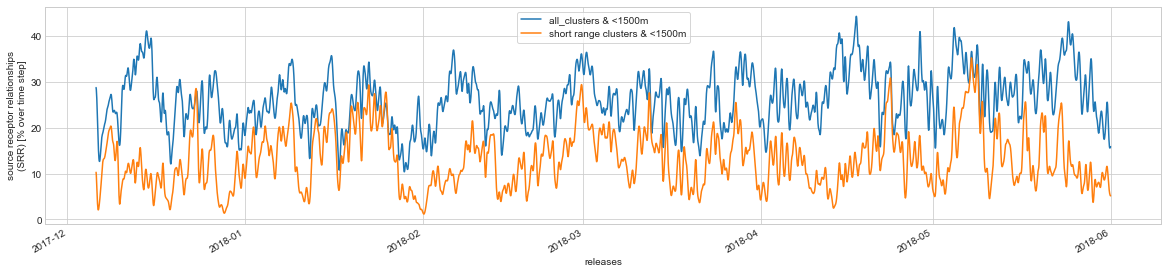

In [31]:
ds_sr = ds.where( ds[ co.LAB ].isin( co.short_range_clusters ) )

dsum = ds_sr[ new_lab_p_t ].sum( [ co.R_CENTER , co.TH_CENTER , co.ZM ] ,
                                 keep_attrs=True )

_boo = (ds[ co.ZM ] - ds[ co.TOPO ]) < 1500
_ds = ds[ new_lab_p_t ].where( _boo ).sum(
    [ co.R_CENTER , co.TH_CENTER , co.ZM ] , keep_attrs=True )

figsize_ = dict( figsize=(20 , 4) )
f , ax = plt.subplots( **figsize_ )
_ds.plot( label='all_clusters & <1500m' , ax=ax )
dsum.plot( label='short range clusters & <1500m' , ax=ax )
ax.legend()
plt.show()

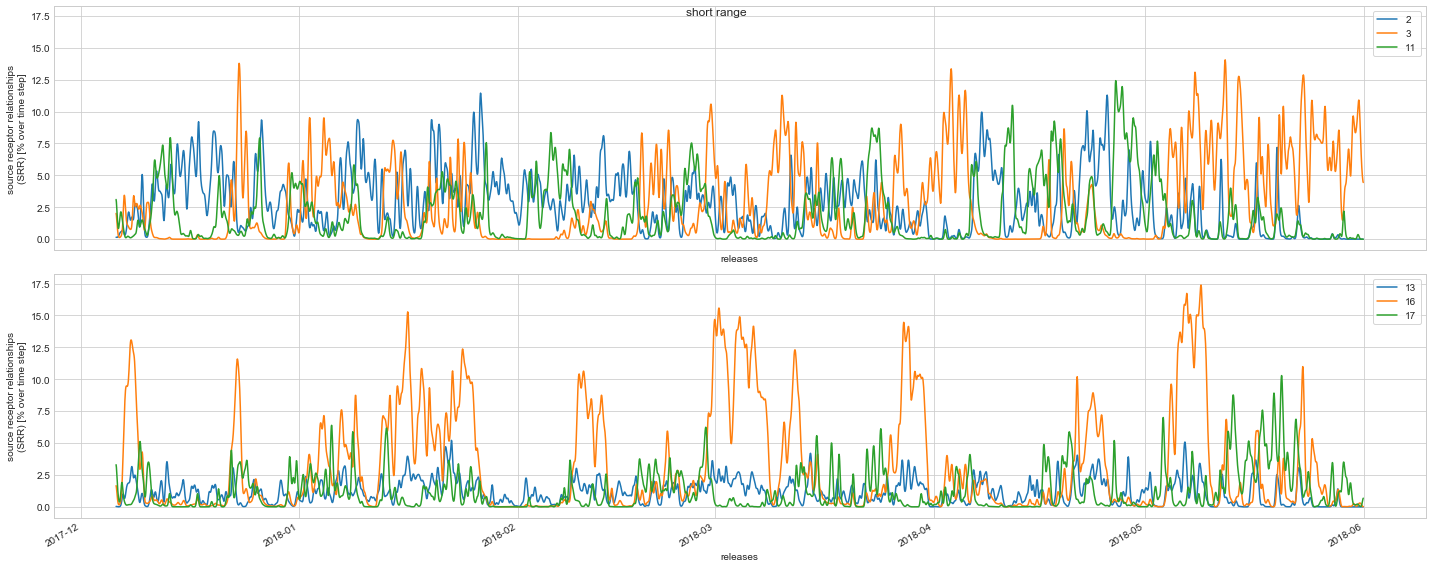

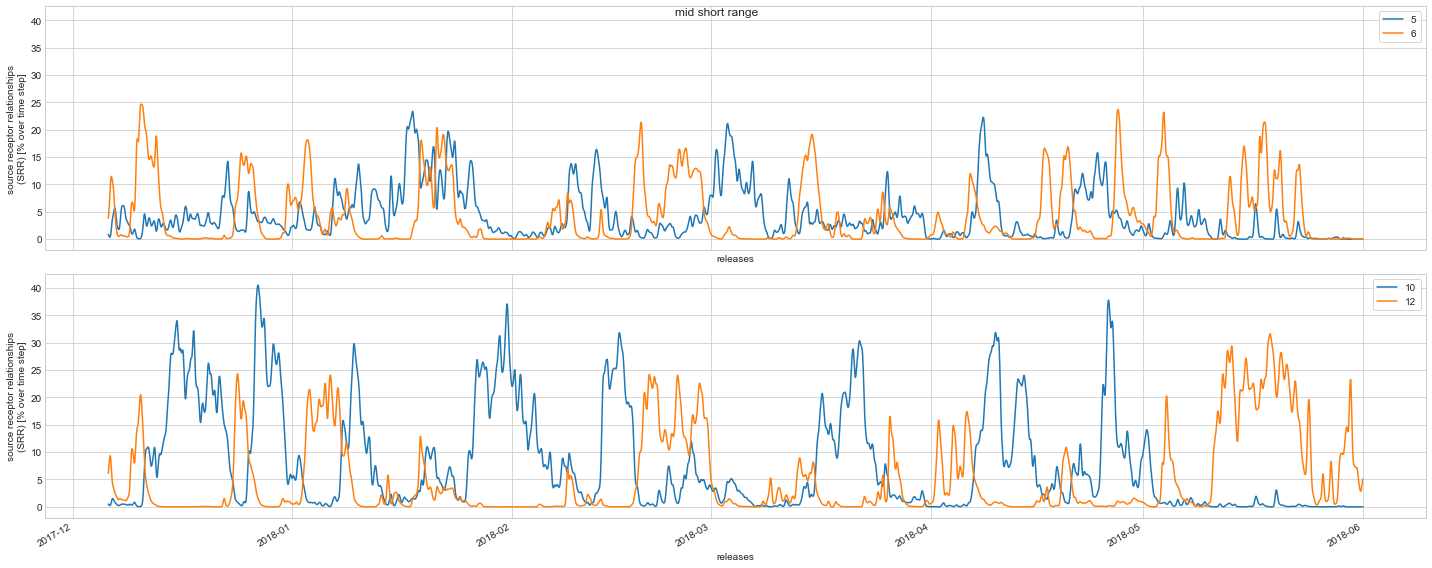

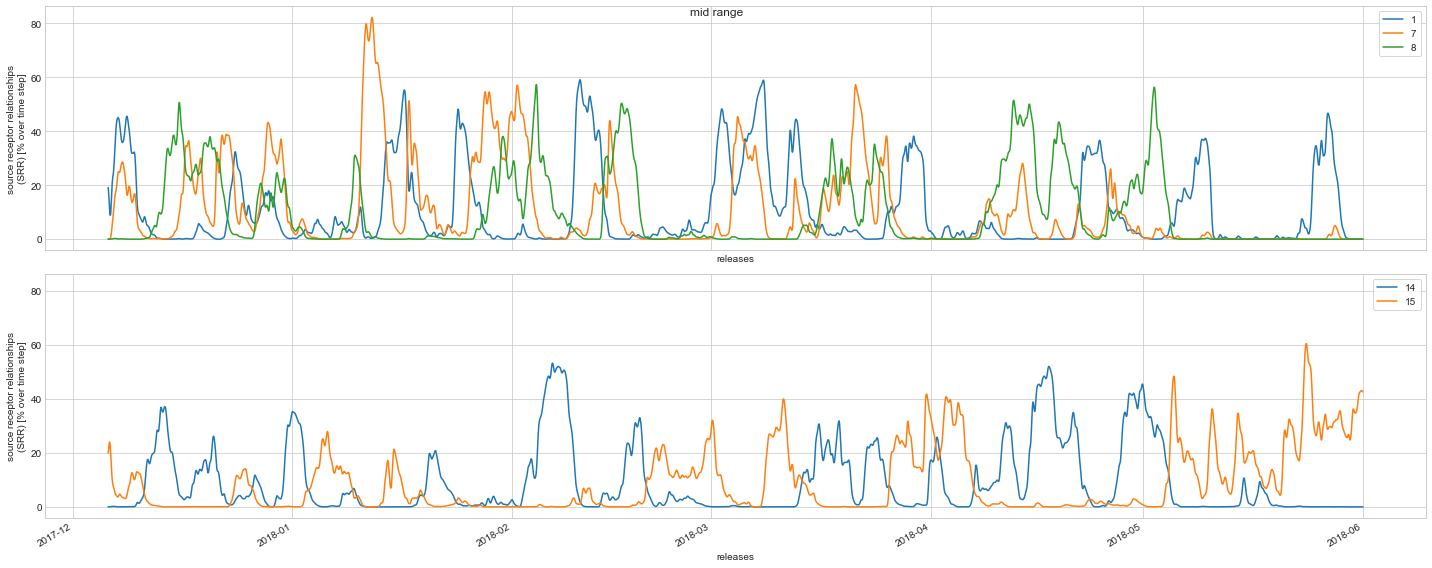

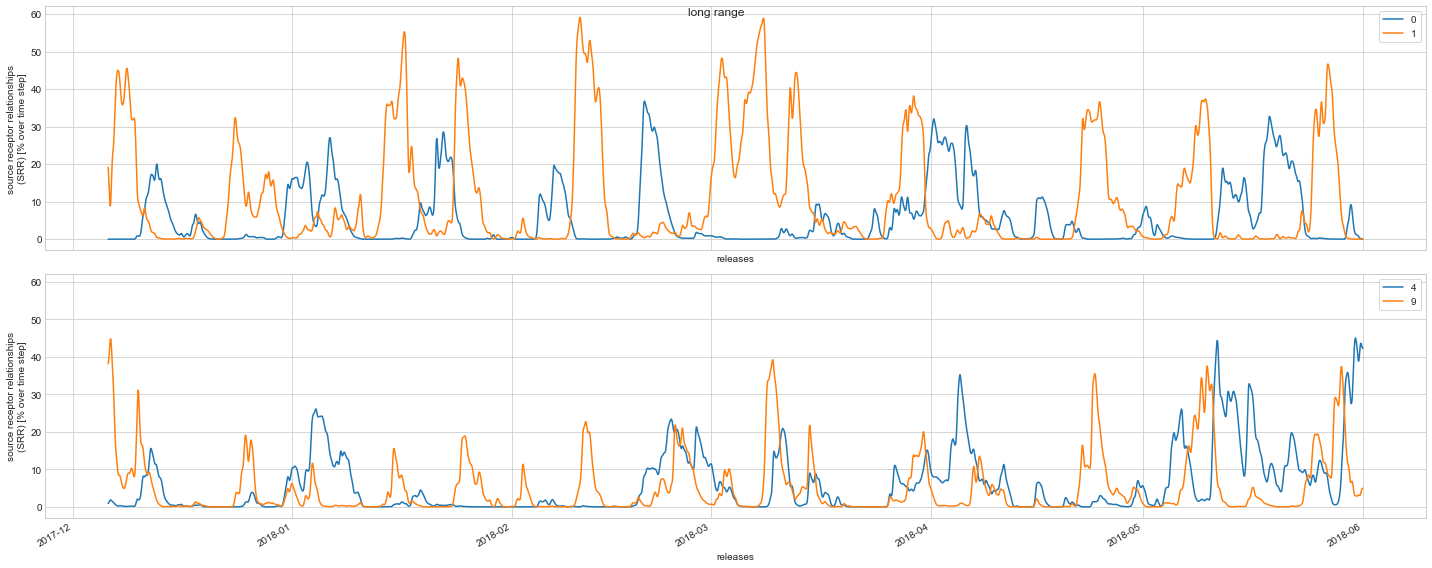

In [36]:
# i = 1
# range = co.mid_short_range_clusters
ranges = [ co.short_range_clusters , co.mid_short_range_clusters ,
           co.mid_range_clusters , co.long_range_clusters ]
range_names = ['short range', 'mid short range', 'mid range', 'long range']
da = ds[ new_lab_p_t ]
for range,name in zip(ranges,range_names) :
    plot_range( da , ds , range ,name)